# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

ANSWER:  
1. I chose bookReviewsData.csv  
2. I will be predicting whether a review is positive or not. The label is `Positive Review`.  
3. This would be a supervised binary classification problem
4. My feature would be the `Review` column.  
5. This model can help a company determine how well their product is doing in the market. Whether a lot of people like it or it should be discontinued.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
df.shape

(1973, 2)

In [4]:
df.dtypes

Review             object
Positive Review      bool
dtype: object

In [5]:
df.isnull().any()

Review             False
Positive Review    False
dtype: bool

Checking to see if the classes are balanced

In [31]:
df["Positive Review"]. value_counts()

False    993
True     980
Name: Positive Review, dtype: int64

In [6]:
for i, review in enumerate(df["Review"].loc[:5]):
    preview = df["Positive Review"][i]
    print(f"Review {i+1}:\n{review}\n")
    print(f"Positive review : {preview}\n{'-'*40}\n")


Review 1:
This was perhaps the best of Johannes Steinhoff's books, since it does not  deal with his own stellar yet tragic WW II and post war career. The  insights of the average person living in Germany are of great importance to  both social and military historians alike. Steinhoff offered this  collective testament as a warning to all of us regarding war and the rise  of a dictator. As Johannes said in an interview, &quot;It is always the  civilians who suffer the most, yet are remembered the least.&quot


Positive review : True
----------------------------------------

Review 2:
This very fascinating book is a story written in the form of numerous letters and personal diary entries made by the principle character of the book.  It chronicals the life of a young Scottish woman forced to live first in China then Japan.  Well written and historically accurate, it's obvious the author is intimately familiar with the the culture, customs, history and life style of Japan.  This makes the 

In [7]:
!pip install gensim


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [8]:
import gensim

I would have removed stop words using genism; however, looking at its documentation, some of these words appear to be key indicators of whether a review is positive or negative.

 I'll separate the dataset to its feature and label

In [9]:
X = df["Review"]
y = df["Positive Review"]

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I have a feature column: "Review"  
I'm going to  try and perform word embedding first, as context is key to the problem I'm addressing.  
I'm also going to use n-grams of 2 or more, since this is a sentiment analysis, and words like "not" could play a vital role.  
As for my model, I'm going to be using a traditional neural network.  
During the training period, I'm going to use an SGD optimizer, Binary Cross Entropy as my loss function, an accuracy metric.  
Depending on how my model performs, I'm going to be changing the number of hidden layers (starting from 3 layers), epochs, dropout layers (for regularization), and min_df.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [10]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import time
import gensim

2025-07-30 03:25:21.234787: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-07-30 03:25:21.234825: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

**Change of Plans**

I initially tried using word embedding, but I got really low results. I believe its because before I passed it into the neural network, I had to calculate the average of the vectors and use that. This could have made the word embeddings lose their meaning.  
So I'm going to use TFIDF vectorization.

**Performing TFIDF Vectorization**

In [11]:
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.25, random_state = 123) 

In [12]:
# 1. Create a TfidfVectorizer object 
tfidf_vectorizer = TfidfVectorizer(min_df = 2, ngram_range=(1,4))


# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X_train)


# 3. Using the fitted vectorizer, transform the training data 
X_train_tfidf = tfidf_vectorizer.transform(X_train)


# 4. Using the fitted vectorizer, transform the test data 
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [13]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

77609


**Building the Neural Network**

In [14]:
# Model object
nn_model = keras.Sequential()

# Input layer 
input_layer = keras.layers.InputLayer(input_shape = vocabulary_size, name = "input")
nn_model.add(input_layer)
nn_model.add(keras.layers.Dropout(.25))
# First hidden layer 
hidden_layer_1 = keras.layers.Dense(units = 64, activation = "relu", name = "hl_1")
nn_model.add(hidden_layer_1)
nn_model.add(keras.layers.Dropout(.25))
# Second hidden layer 
hidden_layer_2 = keras.layers.Dense(units = 32, activation = "relu", name = "hl_2")
nn_model.add(hidden_layer_2)
nn_model.add(keras.layers.Dropout(.25))

# Third hidden layer
hidden_layer_3 = keras.layers.Dense(units = 16, activation = "relu", name = "hl_3")
nn_model.add(hidden_layer_3)
nn_model.add(keras.layers.Dropout(.4))


#Output layer 
output_layer = keras.layers.Dense(units = 1, activation = "sigmoid", name = "output")
nn_model.add(output_layer)

nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 77609)             0         
_________________________________________________________________
hl_1 (Dense)                 (None, 64)                4967040   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
hl_2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
hl_3 (Dense)                 (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0

2025-07-30 03:25:24.283814: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-07-30 03:25:24.283845: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2025-07-30 03:25:24.283864: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-0bc3e2374dea6c8da): /proc/driver/nvidia/version does not exist
2025-07-30 03:25:24.284070: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
sgd_optimizer = keras.optimizers.SGD(learning_rate = 0.1)
loss_fn = keras.losses.BinaryCrossentropy(from_logits = False)
nn_model.compile(optimizer = sgd_optimizer, loss = loss_fn, metrics = ["accuracy"])

In [16]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


In [17]:
t0 = time.time()  # start time

num_epochs = 95  # epochs

history = nn_model.fit(
    X_train_tfidf.toarray(),
    y_train,
    epochs=num_epochs,
    verbose=0,
    validation_split=0.2,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)]
)

t1 = time.time()  # stop time

print('Elapsed time: %.2fs' % (t1 - t0))


2025-07-30 03:25:25.376032: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2025-07-30 03:25:25.376394: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2649995000 Hz


Epoch [5/ 95], Loss: 0.6928, Accuracy: 0.5089, Val_loss: 0.6925, Val_accuracy: 0.6453
Epoch [10/ 95], Loss: 0.6888, Accuracy: 0.5495, Val_loss: 0.6898, Val_accuracy: 0.4966
Epoch [15/ 95], Loss: 0.6674, Accuracy: 0.6365, Val_loss: 0.6765, Val_accuracy: 0.5439
Epoch [20/ 95], Loss: 0.6010, Accuracy: 0.6974, Val_loss: 0.7043, Val_accuracy: 0.5034
Epoch [25/ 95], Loss: 0.5237, Accuracy: 0.7447, Val_loss: 0.7241, Val_accuracy: 0.5236
Epoch [30/ 95], Loss: 0.3609, Accuracy: 0.8740, Val_loss: 0.5110, Val_accuracy: 0.7399
Epoch [35/ 95], Loss: 0.2615, Accuracy: 0.9121, Val_loss: 0.8990, Val_accuracy: 0.6149
Epoch [40/ 95], Loss: 0.4873, Accuracy: 0.8462, Val_loss: 0.7964, Val_accuracy: 0.6149
Epoch [45/ 95], Loss: 0.2102, Accuracy: 0.9434, Val_loss: 0.3798, Val_accuracy: 0.8412
Epoch [50/ 95], Loss: 0.0411, Accuracy: 0.9975, Val_loss: 0.4239, Val_accuracy: 0.8378
Epoch [55/ 95], Loss: 0.3302, Accuracy: 0.8893, Val_loss: 2.0104, Val_accuracy: 0.4966
Epoch [60/ 95], Loss: 0.2943, Accuracy: 0.90

In [18]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

16/16 [==============================] - 0s 3ms/step - loss: 0.8684 - accuracy: 0.7854
Loss:  0.8684330582618713 Accuracy:  0.7854251265525818


In [19]:
# Make predictions on the test set
probability_predictions = nn_model.predict(X_test_tfidf.toarray())

print("Predictions for the first 20 examples:")
for i, prob in enumerate(probability_predictions[:20]):
    prob_val = prob[0]
    if prob_val > 0.5:
        print(f"The probability value is {prob_val:.4f}, and the corresponding label in y_test is {y_test.to_numpy()[i]}")


Predictions for the first 20 examples:
The probability value is 0.9971, and the corresponding label in y_test is True
The probability value is 0.9999, and the corresponding label in y_test is True
The probability value is 0.9962, and the corresponding label in y_test is True
The probability value is 0.9933, and the corresponding label in y_test is False
The probability value is 0.9990, and the corresponding label in y_test is True
The probability value is 0.9993, and the corresponding label in y_test is True
The probability value is 0.9997, and the corresponding label in y_test is True
The probability value is 0.9981, and the corresponding label in y_test is True
The probability value is 0.9993, and the corresponding label in y_test is True
The probability value is 0.9907, and the corresponding label in y_test is False
The probability value is 0.9952, and the corresponding label in y_test is True
The probability value is 0.9803, and the corresponding label in y_test is False
The probab

I'm going to check how well it performs on some examples

In [21]:
print('Review #1:\n')

print(X_test.to_numpy()[24])

goodReview = True if probability_predictions[24] >= .5 else False

print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[24]))

Review #2:

Good book on deal structure, but if you want a valuation number, check out &quot;Unlocking the Value of Your Business&quot;


Prediction: Is this a good review? True

Actual: Is this a good review? False



In [22]:
print('Review #2:\n')

print(X_test.to_numpy()[24])

goodReview = True if probability_predictions[36] >= .5 else False

print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[36]))

Review #2:

Good book on deal structure, but if you want a valuation number, check out &quot;Unlocking the Value of Your Business&quot;


Prediction: Is this a good review? True

Actual: Is this a good review? True



In [23]:
print('Review #3:\n')

print(X_test.to_numpy()[24])

goodReview = True if probability_predictions[492] >= .5 else False

print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[492]))

Review #2:

Good book on deal structure, but if you want a valuation number, check out &quot;Unlocking the Value of Your Business&quot;


Prediction: Is this a good review? True

Actual: Is this a good review? True



**Discussion Part 1**

No matter how much I change the drop out layers, change the epochs, or change the number of hidden layers and units, the accurcay doesn't really change from 0.7 and the loss is still much. As a result I'm going to try training a logistic regression model, as I think the dataset is small for the neural network.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [27]:

lrmodel= LogisticRegression()

lrmodel.fit(X_train_tfidf.toarray(),y_train)
lrprobability_predictions = lrmodel.predict_proba(X_test_tfidf.toarray())
class_label_predictions = lrmodel.predict(X_test_tfidf.toarray())

In [28]:
#compute log loss
l_loss = log_loss (y_test, lrprobability_predictions)
print(f"Log loss: {l_loss}")
#compute accuracy
lracc_score = accuracy_score(y_test,class_label_predictions)
print(f"Accuracy: {acc_score}")

Log loss: 0.5487183796120372
Accuracy: 0.8137651821862348


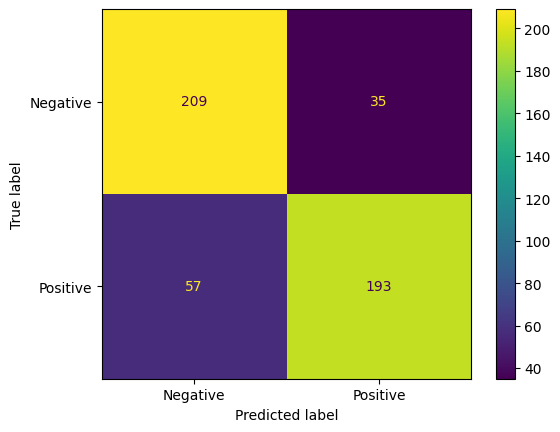

In [34]:
cm = confusion_matrix(y_test,class_label_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()

Let's try changing thresholds to get better result

In [43]:
# Predict probabilities
y_proba = lrmodel.predict_proba(X_test_tfidf.toarray())[:, 1]  # probabilities for class 1

# Custom threshold
threshold = [0.5, 0.55 ,0.7]  
for t in threshold:
    y_pred_custom = (y_proba >= t).astype(int)

    results_df = pd.DataFrame({
        'Predicted_Probability': y_proba,
        'Predicted_Label':y_pred_custom ,
        'Actual_Label': y_test.reset_index(drop=True)  # make sure index matches
    })
    print(results_df.head(10))
    acc_score = accuracy_score(y_test,y_pred_custom)
    print(f"Accuracy: {acc_score}")

   Predicted_Probability  Predicted_Label  Actual_Label
0               0.515439                1          True
1               0.409019                0         False
2               0.699246                1          True
3               0.531948                1          True
4               0.426856                0         False
5               0.598959                1          True
6               0.339826                0         False
7               0.402986                0         False
8               0.564441                1          True
9               0.335148                0         False
Accuracy: 0.8137651821862348
   Predicted_Probability  Predicted_Label  Actual_Label
0               0.515439                0          True
1               0.409019                0         False
2               0.699246                1          True
3               0.531948                0          True
4               0.426856                0         False
5               0.5

**Discussion Part 2**

Logistic regression performs much better than the neural network as thought. Similarly, it makes sense that 0.5 as the threshold gives the best output as it's a simple true or false label.